# Statistical analysis of pain studies

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

## Load the data

In [5]:
data_folder = './csv/'
group_names = ['A', 'B', 'C', 'D', 'E']
limbs = ['forelimb', 'hindlimb']

data = dict()
for group in group_names:
    if group not in data:
        data[group] = dict()
        data[group][limbs[0]] = dict()
        data[group][limbs[1]] = dict()

    # Get all CSV files with group in their name
    for limb in limbs:
        for file in os.listdir(data_folder):
            if file.endswith('.csv') and group in file and limb in file:
                file_path = os.path.join(data_folder, file)
                df = pd.read_csv(file_path)
                for feature in df.columns:
                    if feature not in data[group][limb]:
                        data[group][limb][feature] = dict()
                    data[group][limb][feature] = df[feature].tolist()
print(data['A']['forelimb'].keys())

dict_keys(['Dataset and Mouse', 'Number of runs', 'Number of runs std', 'Mean number of steps', 'Mean number of steps std', 'Mean step height', 'Mean step height std', 'Mean step length', 'Mean step length std', 'Mean step duration', 'Mean step duration std', 'Mean step frequency', 'Mean step frequency std', 'Mean propulsion vector angle', 'Mean propulsion vector angle std', 'Time mean', 'Time std', 'Instant speed - Spine - X mean', 'Instant speed - Spine - X std', 'Instant speed - Spine - Y mean', 'Instant speed - Spine - Y std'])


## Plot the data

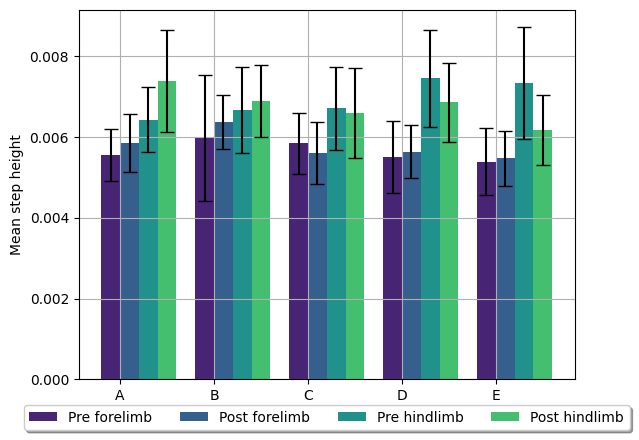

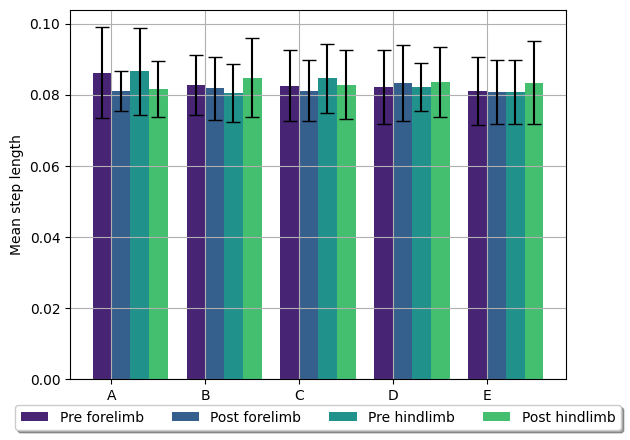

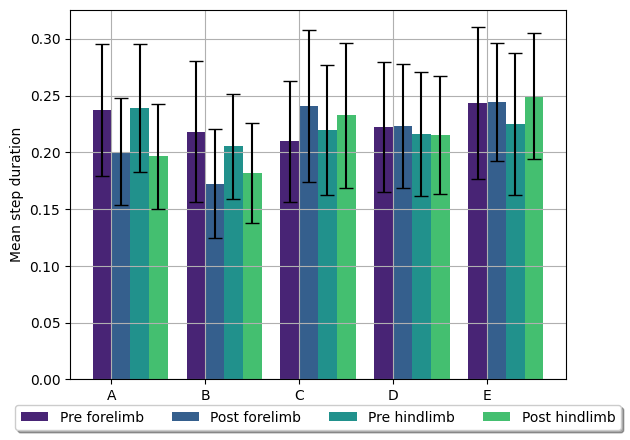

In [6]:
# Select the columns for the histogram
features_to_compare = ['Mean step height', 'Mean step length', 'Mean step duration']

for feature in features_to_compare:
    pre_data_forelimb = [data[group]['forelimb'][feature][0] for group in group_names]
    pre_data_forelimb_std = [data[group]['forelimb'][feature + ' std'][0] for group in group_names]
    pre_data_hindlimb = [data[group]['hindlimb'][feature][0] for group in group_names]
    pre_data_hindlimb_std = [data[group]['hindlimb'][feature + ' std'][0] for group in group_names]
    post_data_forelimb = [data[group]['forelimb'][feature][2] for group in group_names]
    post_data_forelimb_std = [data[group]['forelimb'][feature + ' std'][2] for group in group_names]
    post_data_hindlimb = [data[group]['hindlimb'][feature][2] for group in group_names]
    post_data_hindlimb_std = [data[group]['hindlimb'][feature + ' std'][2] for group in group_names]

    plt.figure()
    bar_width = 0.2
    index = np.arange(len(group_names))
    cmap = plt.get_cmap('viridis')

    plt.bar(index, pre_data_forelimb, bar_width, yerr=pre_data_forelimb_std, label='Pre forelimb', color=cmap(0.1), capsize=5)
    plt.bar(index + bar_width, post_data_forelimb, bar_width, yerr=post_data_forelimb_std, label='Post forelimb', color=cmap(0.3), capsize=5)
    plt.bar(index + 2*bar_width, pre_data_hindlimb, bar_width, yerr=pre_data_hindlimb_std, label='Pre hindlimb', color=cmap(0.5), capsize=5)
    plt.bar(index + 3*bar_width, post_data_hindlimb, bar_width, yerr=post_data_hindlimb_std, label='Post hindlimb', color=cmap(0.7), capsize=5)

    # plt.xlabel('Group')
    plt.ylabel(feature)
    plt.xticks(index + bar_width / 2, group_names)
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), fancybox=True, shadow=True, ncol=4)
    plt.grid()
    plt.show()
